In [2]:
import sys
from pathlib import Path

sys.path.append(r"/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from data_analysis.data_fetcher.data_fetcher_class import DataFetcher
from data_collection.consts import  DB_PARAMS

In [3]:
fetcher = DataFetcher(DB_PARAMS)

Available regressors:
 - avg_default_verbolizer
 - avg_shrink_verbolizer
 - doc_len
 - eps_surprise
 - f_size
 - full_list_default_verbolizer
 - full_list_shrink_verbolizer
 - hv_orig_score
 - lm_orig_score
 - max_abs_default
 - max_abs_shrink
 - max_default_verbolizer
 - max_shrink_verbolizer
 - md_hv1
 - md_hv2
 - md_hv3
 - md_lm1
 - md_lm2
 - md_lm3
 - min_default_verbolizer
 - min_shrink_verbolizer
 - stretch_default
 - stretch_shrink
Available sectors:
 - Technology (92)
 - Industrials (86)
 - Financial Services (85)
 - Healthcare (66)
 - Consumer Cyclical (58)
 - Consumer Defensive (40)
 - Real Estate (32)
 - Utilities (32)
 - Energy (30)
 - Basic Materials (23)
 - Communication Services (22)


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:132: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:107: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [4]:
df = fetcher.fetch_data(
    regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    
    ],
    prepare_fixed_effects=True,
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:226: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

In [5]:
df

report_type  hv_orig_score    md_hv1    md_hv2    md_hv3  \
company date                                                              
A       2018.1        10-Q       0.282086  0.389517  0.471162  0.138873   
        2018.2        10-Q       0.283859  0.391879  0.481426  0.121899   
        2018.3        10-Q       0.289956  0.387794  0.483189  0.114439   
        2018.4        10-K       0.402656  0.407274  0.467143  0.127188   
        2019.1        10-Q       0.295541  0.412048  0.463092  0.144105   
...                    ...            ...       ...       ...       ...   
ZTS     2023.4        10-Q       0.555752  0.419307  0.424917  0.090220   
        2024.1        10-K       0.445931  0.390678  0.464941  0.141537   
        2024.2        10-Q       0.511918  0.412575  0.424534  0.099913   
        2024.3        10-Q       0.532888  0.409023  0.423120  0.092551   
        2024.4        10-Q       0.542013  0.421402  0.415890  0.092799   

                lm_orig_score    md_lm1    md_lm2    md_lm3  two_day_r  ...  \
company date                                                            ...   
A       2018.1      -0.399408 -0.028402 -0.469027 -0.715827   1.277352  ...   
        2018.2      -0.418994 -0.039749 -0.450777 -0.713576   1.178942  ...   
        2018.3      -0.405858 -0.044361 -0.456012 -0.701092   0.007407  ...   
        2018.4      -0.422794  0.058824 -0.441474 -0.664823  -1.932819  ...   
        2019.1      -0.468391 -0.025729 -0.449024 -0.641541  -0.633294  ...   
...                       ...       ...       ...       ...        ...  ...   
ZTS     2023.4      -0.520231 -0.044053 -0.306569 -0.551020   0.702251  ...   
        2024.1      -0.543266  0.024427 -0.392147 -0.600982   1.678560  ...   
        2024.2      -0.602649 -0.016791 -0.321160 -0.534759  -0.382708  ...   
        2024.3      -0.590296 -0.051245 -0.333333 -0.520170   0.812244  ...   
        2024.4      -0.572973 -0.047550 -0.326957 -0.519833  -1.372873  ...   

                six_day_abn_r  seven_day_abn_r  full_q_abn_r  two_day_r_vol  \
company date                                                                  
A       2018.1       0.197947         0.251472     -0.166246       0.152572   
        2018.2       0.398711         0.405128      0.006692       0.102017   
        2018.3       0.338688         0.193872      0.186312       0.026623   
        2018.4       0.140295        -0.220152      0.121891       0.094542   
        2019.1      -0.083671         0.018711     -0.275623       0.131182   
...                       ...              ...           ...            ...   
ZTS     2023.4       1.072091         0.904586      0.088919       0.208676   
        2024.1      -0.175948        -0.121877     -0.276364       0.253572   
        2024.2       0.416260         0.271954      0.179312       0.151240   
        2024.3      -0.066901        -0.225643     -0.150549       0.327859   
        2024.4      -1.187457        -0.820590           NaN       0.422700   

                three_day_r_vol  four_day_r_vol  five_day_r_vol  \
company date                                                      
A       2018.1         0.106735        0.097388        0.091725   
        2018.2         0.095403        0.092651        0.094497   
        2018.3         0.038351        0.038646        0.040956   
        2018.4         0.086733        0.114344        0.132806   
        2019.1         0.096568        0.088686        0.088205   
...                         ...             ...             ...   
ZTS     2023.4         0.223903        0.207268        0.195246   
        2024.1         0.230213        0.165258        0.153133   
        2024.2         0.145689        0.156204        0.169648   
        2024.3         0.217504        0.198820        0.185771   
        2024.4         0.378159        0.274052        0.253874   

                six_day_r_vol  seven_day_r_vol  full_q_r_vol  
company date                                    

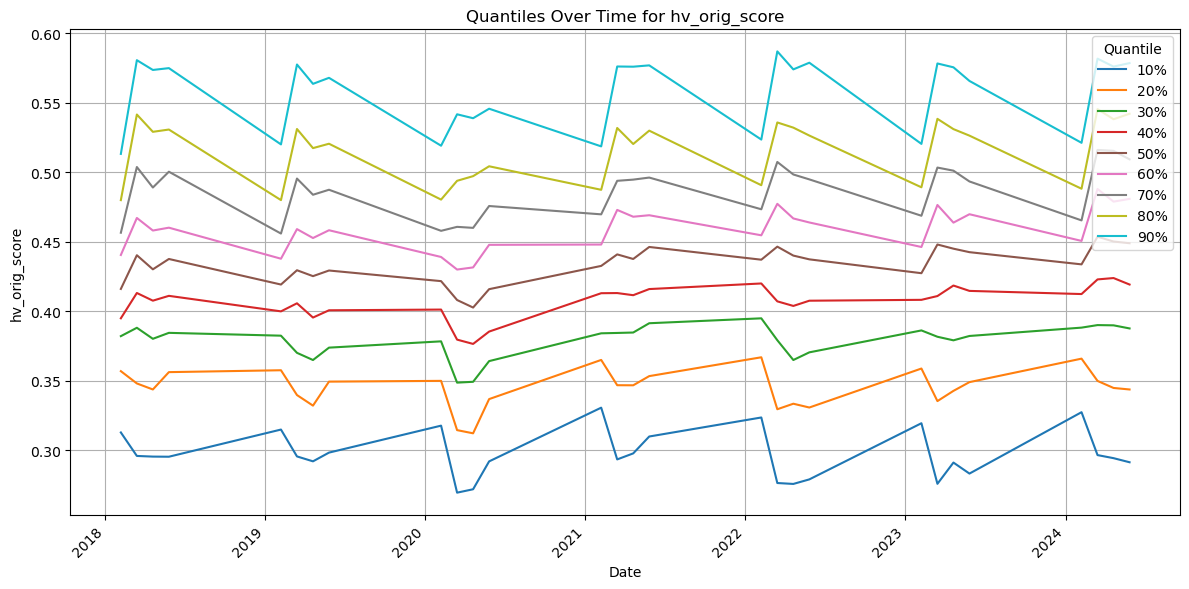

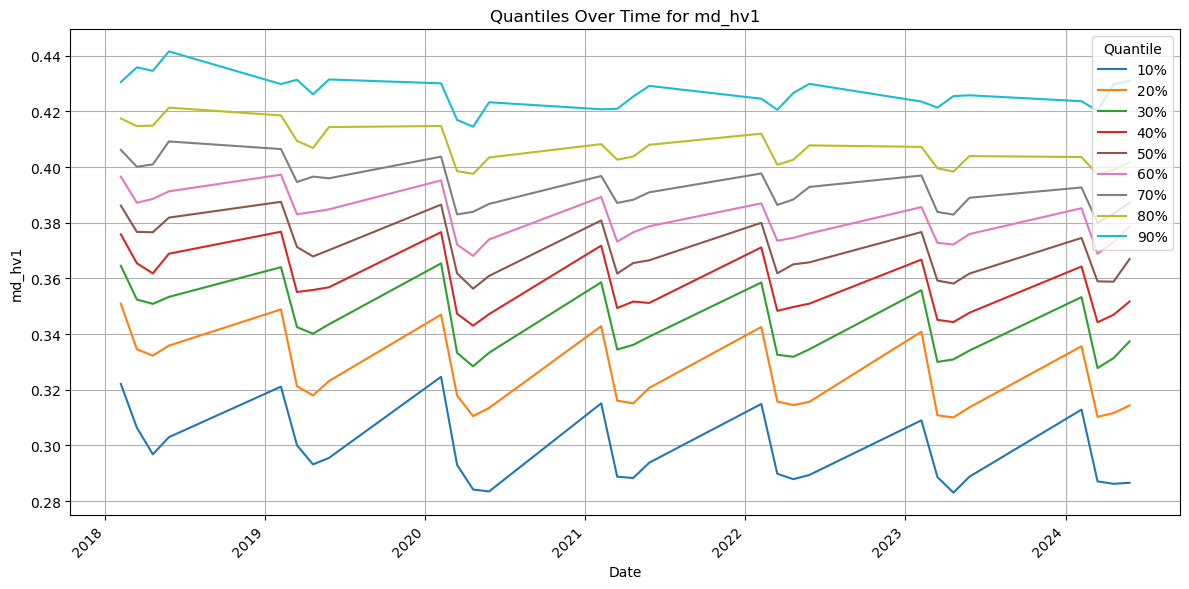

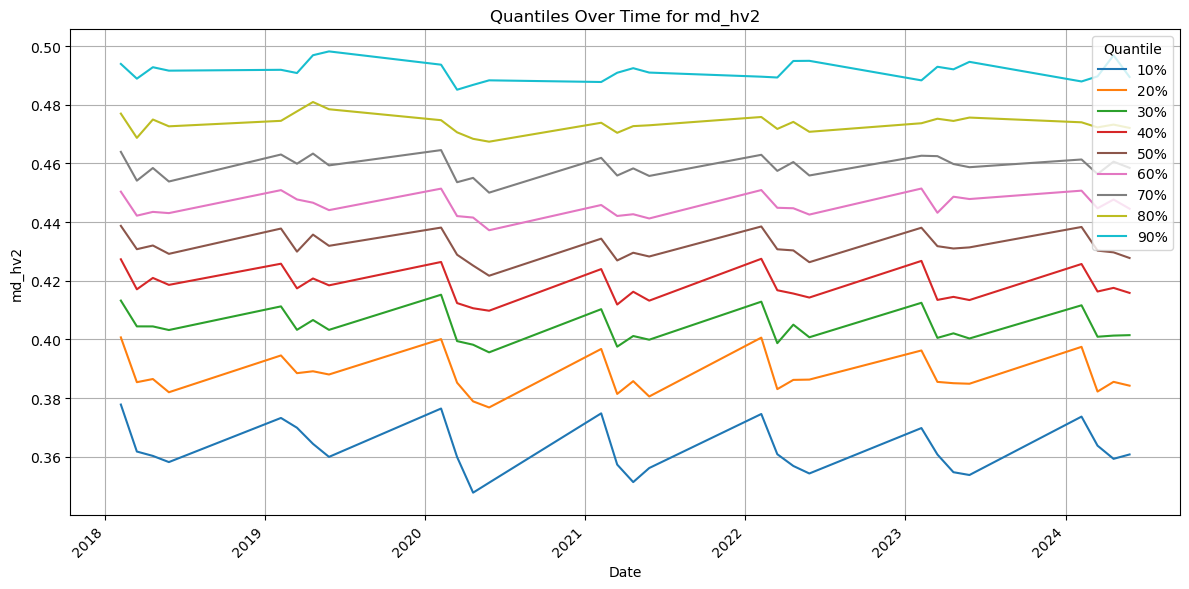

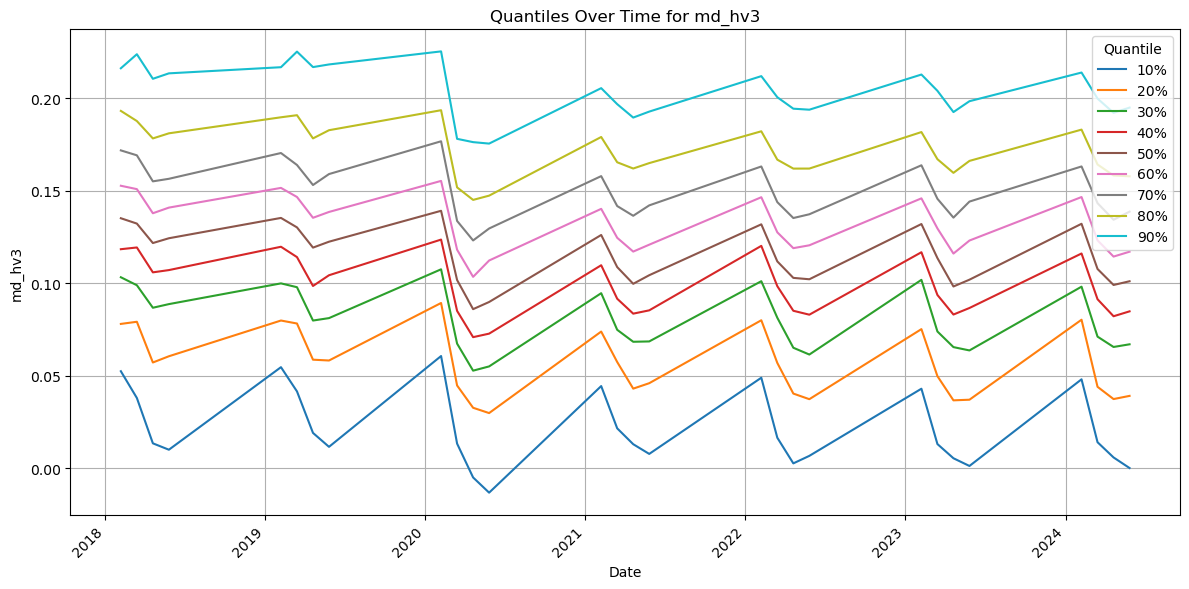

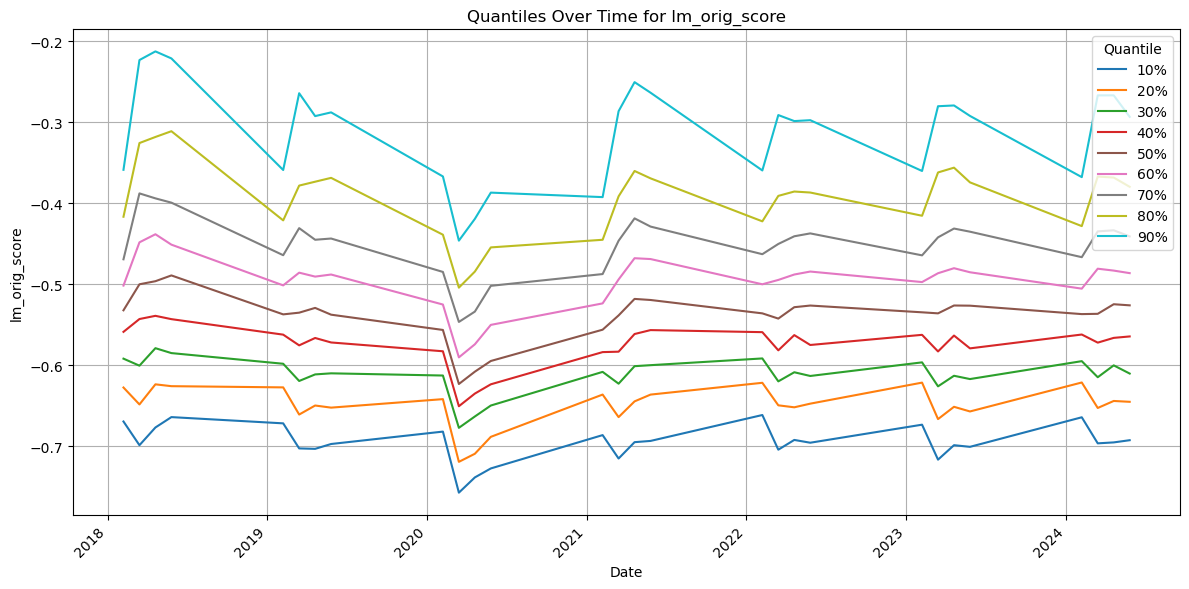

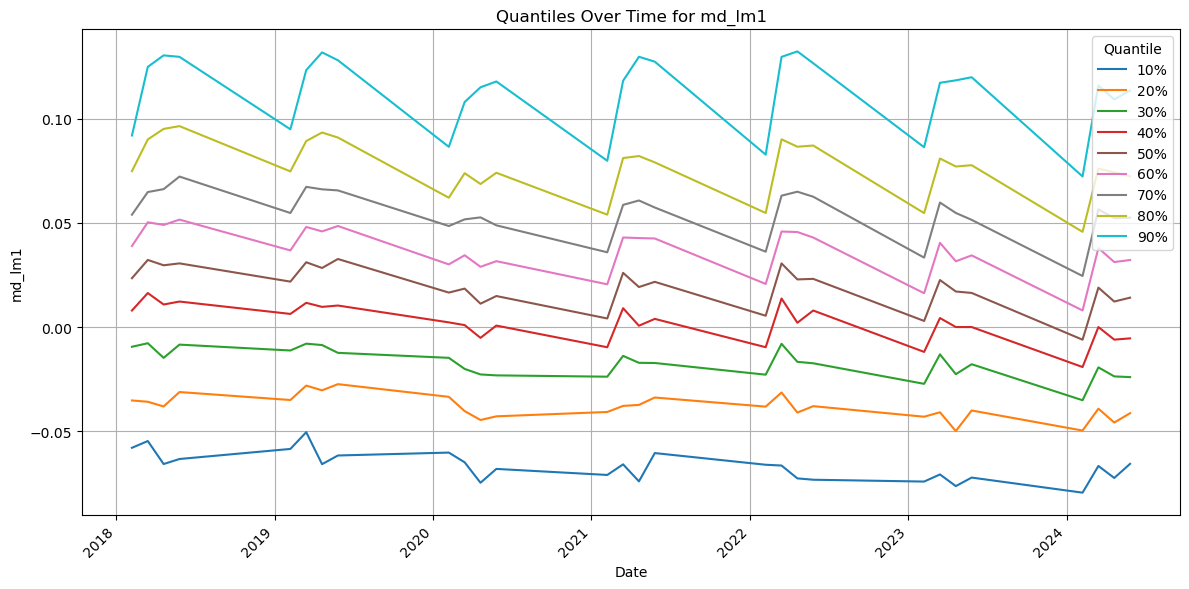

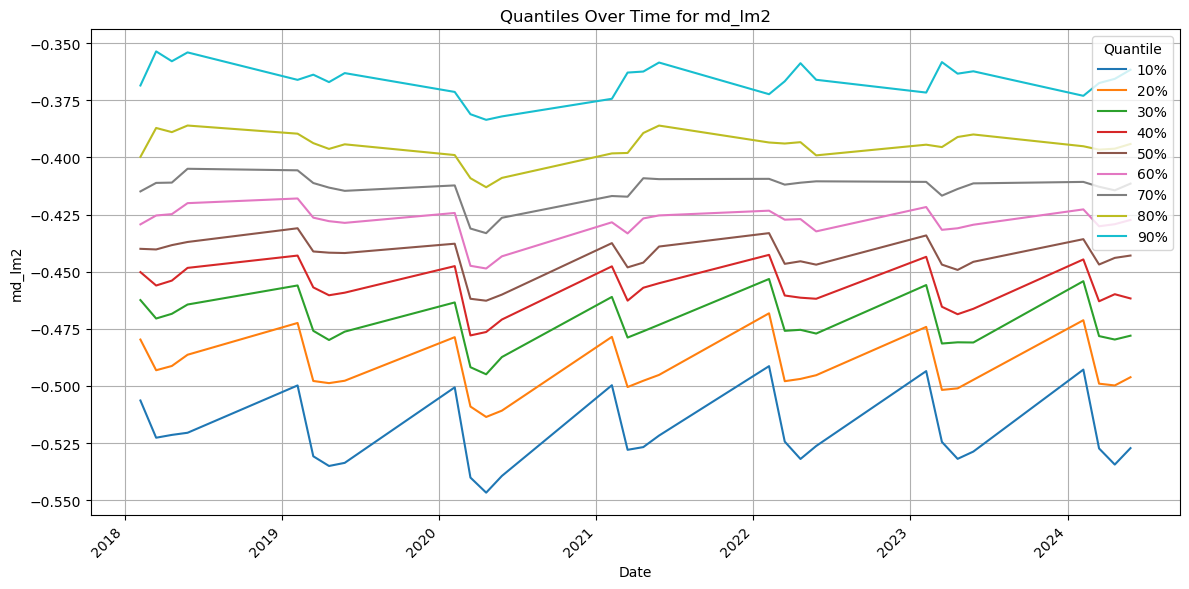

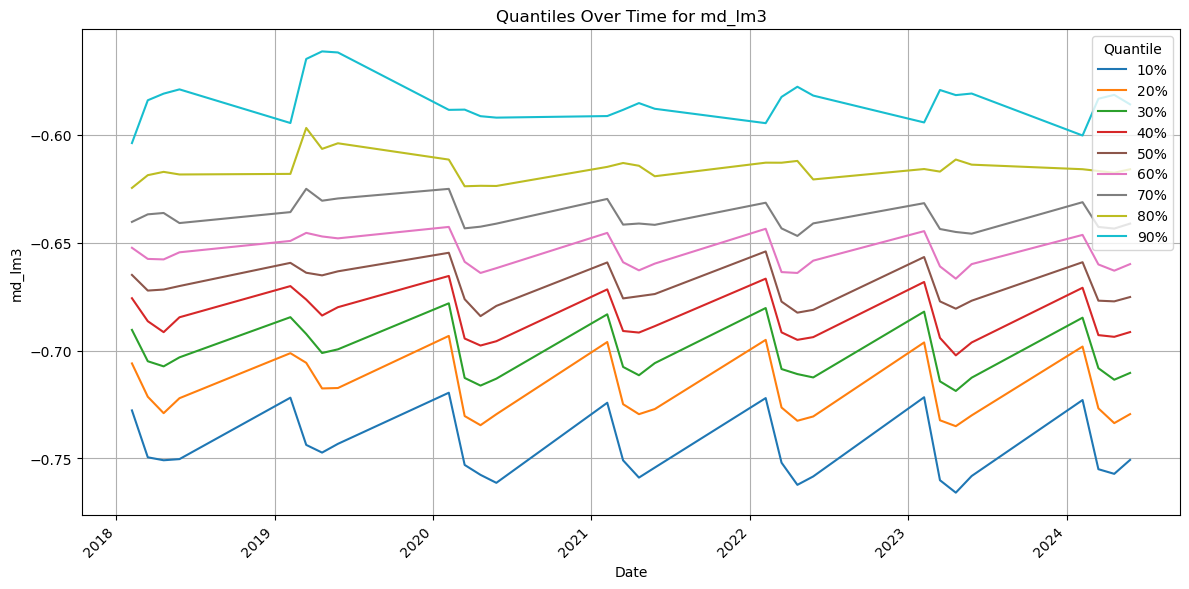

In [6]:
cols=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3'
    ]
quantile_levels = np.linspace(0.1, 0.9, 9)

# Reset index to make 'date' a column
df_reset = df.reset_index()

# For each column: compute quantiles across companies for each date
for col in cols:
    # Pivot: rows = date, columns = company, values = col
    data = df_reset.pivot(index='date', columns='company', values=col)

    # Compute quantiles row-wise (across companies)
    quantiles_df = pd.DataFrame(
        [data.quantile(q, axis=1) for q in quantile_levels],
        index=[f'{int(q*100)}%' for q in quantile_levels]
    ).T  # shape: (n_dates × 9)

    # Plot
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, 9))

    for i, q_label in enumerate(quantiles_df.columns):
        plt.plot(
            quantiles_df.index, 
            quantiles_df[q_label], 
            label=q_label, 
            color=colors[i]
        )

    plt.title(f'Quantiles Over Time for {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend(title='Quantile', loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [7]:
sec_dict = {}

for sec in fetcher.sectors.keys():
    df = fetcher.fetch_data(
  regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3'
    ],
   company_filters={'sector': sec},
   prepare_fixed_effects=True
)
    sec_dict[sec] = df

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:226: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

In [8]:
regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3'
    ]

reg_dict = {}

for reg in regressors:

    sec_dict_avgs = {}
    for sec in sec_dict.keys():
        sec_dict_avgs[sec] = sec_dict[sec][reg].mean()
    
    reg_dict[reg] = sec_dict_avgs

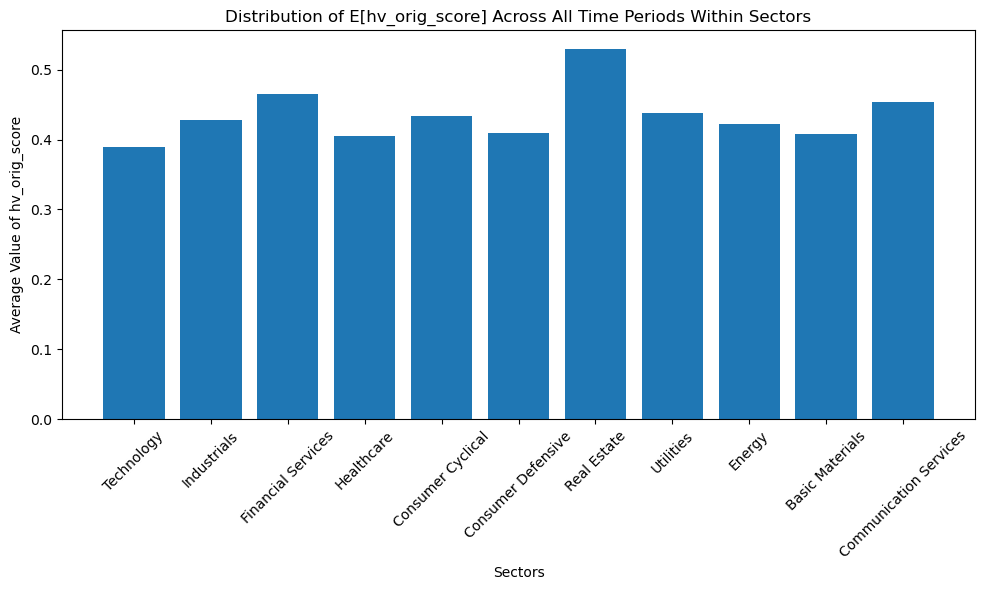

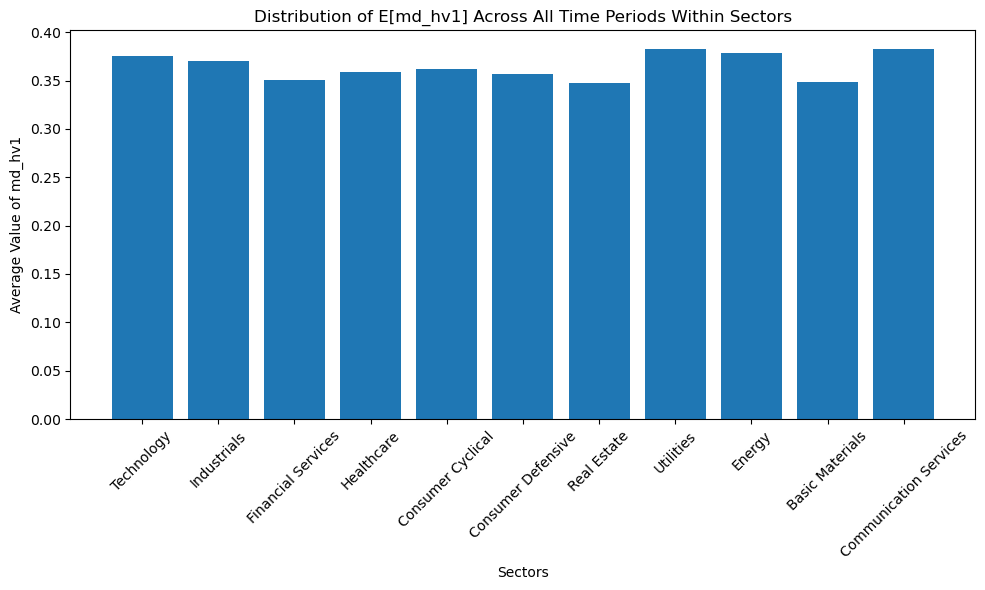

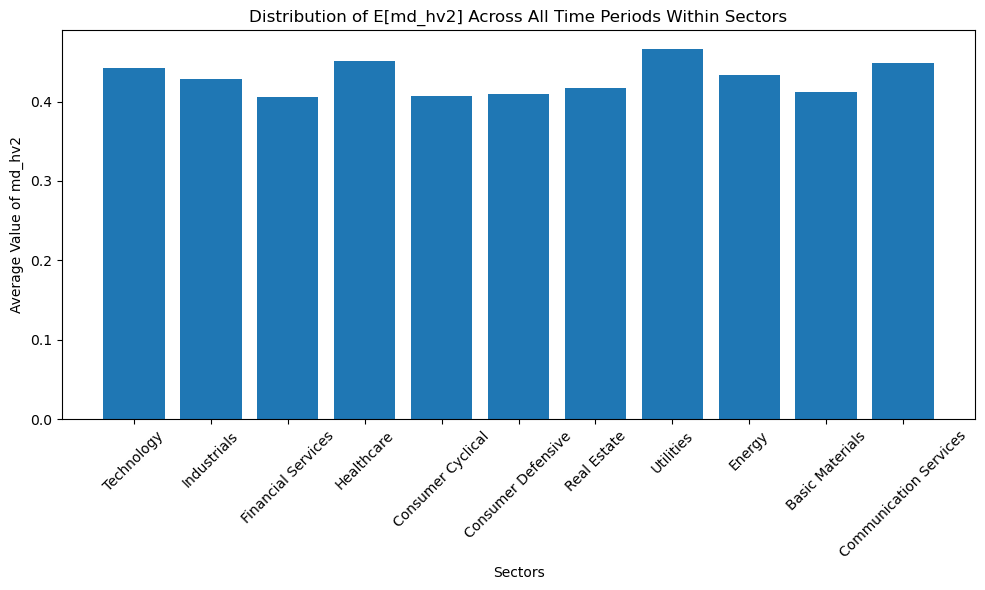

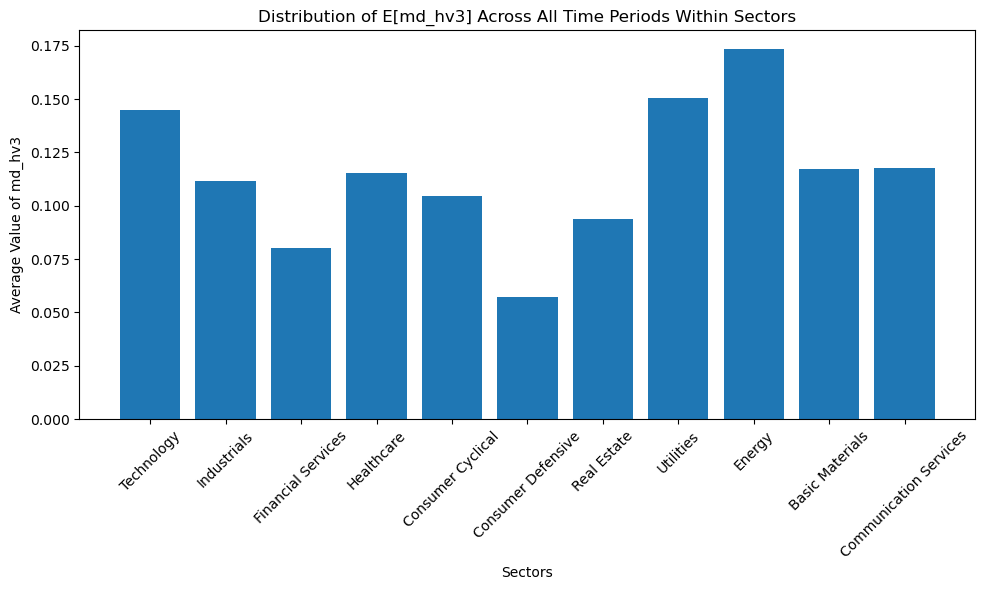

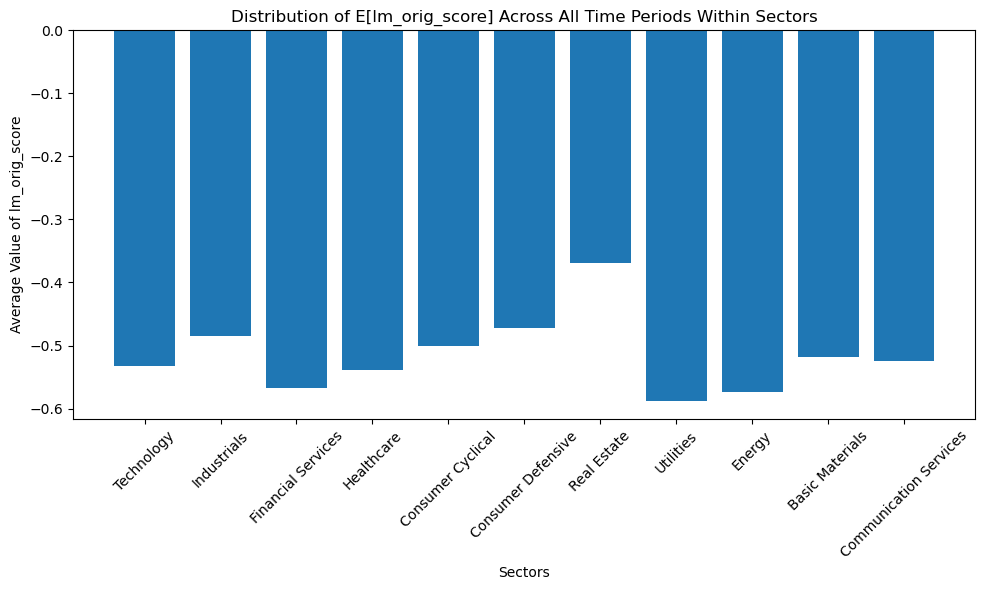

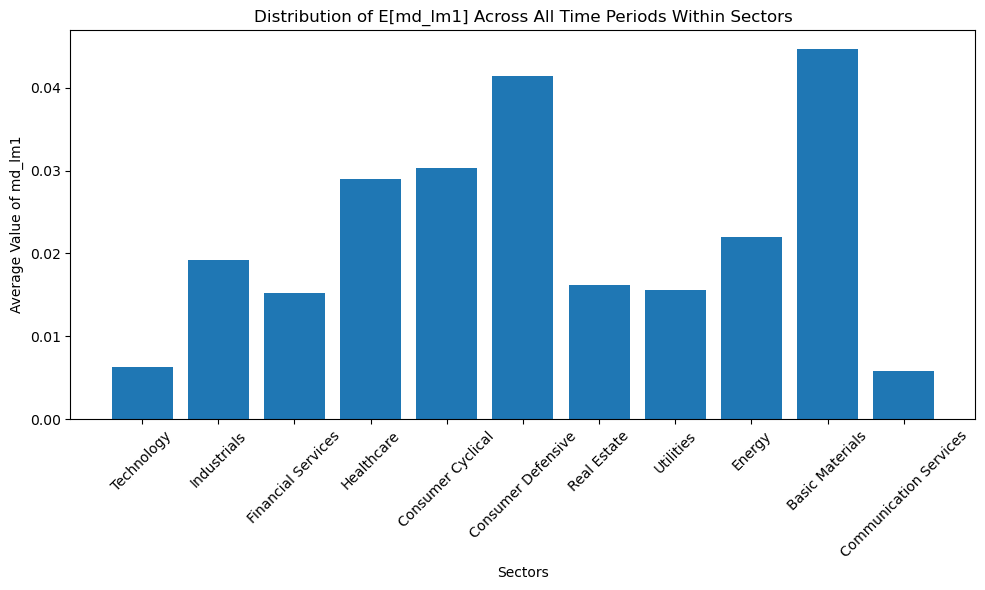

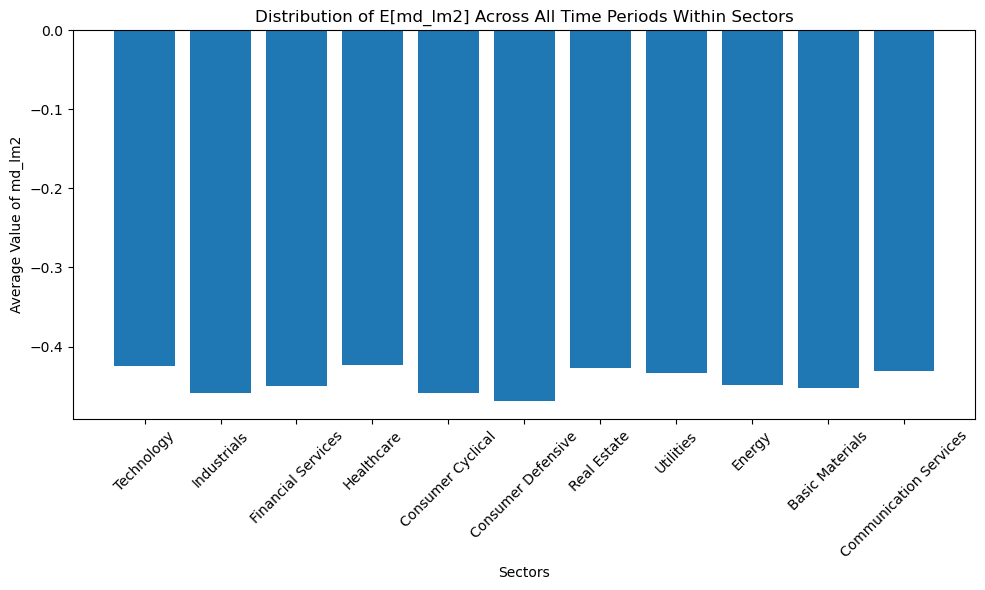

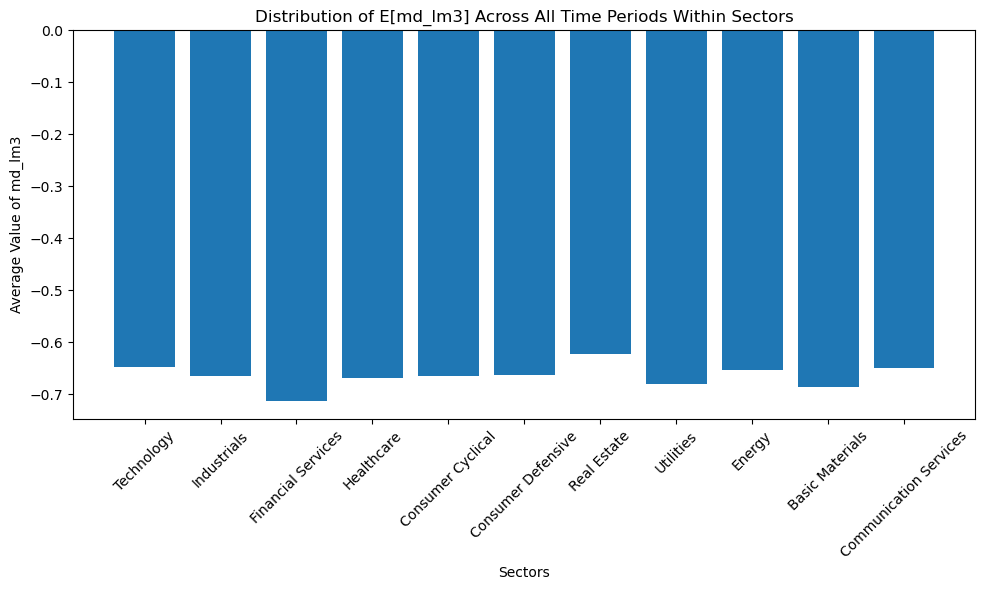

In [9]:
for reg in reg_dict:

    sec_dict_avg = reg_dict[reg]

    keys = list(sec_dict_avg.keys())
    values = list(sec_dict_avg.values())

    plt.figure(figsize=(10, 6))
    plt.bar(keys, values)
    
    # Labeling
    plt.xlabel('Sectors')
    plt.ylabel(f'Average Value of {reg}')
    plt.title(f'Distribution of E[{reg}] Across All Time Periods Within Sectors')
    plt.xticks(
        rotation=45,
        fontsize=10
    )   
    plt.tight_layout()
    plt.show()

In [10]:
regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    'avg_default_verbolizer', 
       'avg_shrink_verbolizer',
       'max_abs_default',
       'max_abs_shrink',
        'max_default_verbolizer',
        'max_shrink_verbolizer',
        'min_default_verbolizer',
        'min_shrink_verbolizer',
        'eps_surprise',
        'f_size',
        'doc_len'
    ]

df1 = fetcher.fetch_data(
    regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    'avg_default_verbolizer', 
       'avg_shrink_verbolizer',
       'max_abs_default',
       'max_abs_shrink',
        'max_default_verbolizer',
        'max_shrink_verbolizer',
        'min_default_verbolizer',
        'min_shrink_verbolizer',
        'eps_surprise',
        'f_size',
        'doc_len'
    ],

    prepare_fixed_effects=True,
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:226: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

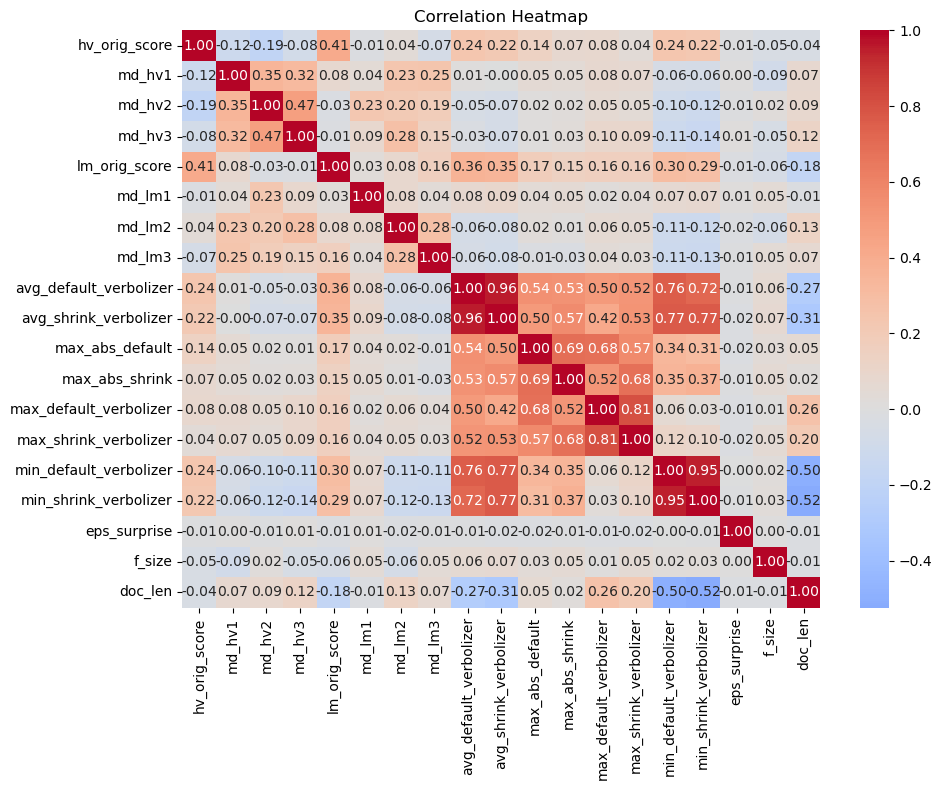

In [11]:
df_subset = df1[regressors]

corr = df_subset.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
